# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Behavior Cloning


---
## Step 0: Load The Data

In [2]:
lines = []
with open('data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
images = []
measurements = []
## for unix, path splitter is /
## for windows, path splitter is \
#PATH_SEPARATOR = '\\'
PATH_SEPARATOR = '/'
#STEERING_CORRECTION = 0.5
STEERING_CORRECTION = 0.8
for line in lines:
    steering_center = float(line[3])
    steering_left = steering_center + STEERING_CORRECTION
    steering_right = steering_center - STEERING_CORRECTION

    center_filename = line[0].split(PATH_SEPARATOR)[-1]
    left_filename = line[1].split(PATH_SEPARATOR)[-1]
    right_filename = line[2].split(PATH_SEPARATOR)[-1]
    current_path = 'data' + PATH_SEPARATOR + 'IMG' + PATH_SEPARATOR
    center_image = cv2.imread(current_path + center_filename)
    left_image = cv2.imread(current_path + left_filename)
    right_image = cv2.imread(current_path + right_filename)
    images.extend([center_image, left_image, right_image])
    measurements.extend([steering_center, steering_left, steering_right])
#    images.append(center_image)
#    measurements.append(steering_center)

augmented_images, augmented_measurements = [], []
for image, measurement in zip(images, measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    augmented_images.append(cv2.flip(image, 1))
    augmented_measurements.append(measurement * -1.0)

X_train = np.array(augmented_images)
y_train = np.array(augmented_measurements)


In [4]:
print(X_train.shape)
print(y_train.shape)


(16072, 160, 320, 3)
(16072,)


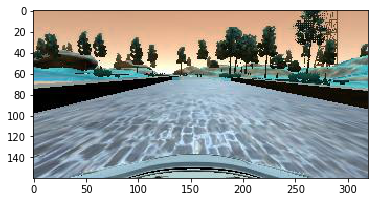

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
image = X_train[0].squeeze()
#fig = plt.figure(figsize=(2,1))
#fig.add_subplot(1,2,1)
plt.imshow(image)


----

## Step 1: Design and Test a Model Architecture



In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Activation, Dropout, Cropping2D
from keras.layers.convolutional import Convolution2D
##from keras.layers.pooling import MaxPooling2D

dropout_prob = 0.5

model = Sequential()
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160, 320, 3)))
### cropping
model.add(Cropping2D(cropping=((72, 25), (0,0))))

model.add(Convolution2D(24, 5, 5, subsample=(2,2), activation="relu"))
model.add(Convolution2D(36, 5, 5, subsample=(2,2), activation="relu"))
model.add(Convolution2D(48, 5, 5, subsample=(2,2), activation="relu"))
model.add(Convolution2D(64, 3, 3, activation="relu"))
model.add(Convolution2D(64, 3, 3, activation="relu"))

model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=5)

model.save('model.h5')
print("model saved!")

Using TensorFlow backend.


Train on 12857 samples, validate on 3215 samples
Epoch 1/5
12857/12857 [==============================] - 29s - loss: 2.3044 - val_loss: 3.3475